## Introduction

In the previous lesson, we learned some of the built-in functions and methods that make exploring and analyzing data easier with pandas.

In this lesson, we'll continue working with the 2017 Fortune [Global 500](https://en.wikipedia.org/wiki/Fortune_Global_500) dataset as we learn more advanced selection and exploration techniques

Here's the data dictionary for the main columns of the f500.csv file:

- company: Name of the company.
- rank: Global 500 rank for the company.
- revenues: Company's total revenue for the fiscal year, in millions of dollars (USD).
- revenue_change: Percentage change in revenue between the current and prior fiscal year.
- profits: Net income for the fiscal year, in millions of dollars (USD).
- sector: Sector in which the company operates.
- previous_rank: Global 500 rank for the company for the prior year.
- country: Country in which the company is headquartered.
- hq_location: City and country, (or city and state for the USA) where the company is headquartered.
- employees: Total employees (full-time equivalent, if available) at fiscal year-end.

## Reading CSV Files with pandas

In [4]:
import pandas as pd
import numpy as np

In [5]:
# read the data set into a pandas dataframe
f500 = pd.read_csv("../Datasets/f500.csv", index_col=0)
f500.index.name = None

# replace 0 values in the "previous_rank" column with NaN
f500.loc[f500["previous_rank"] == 0, "previous_rank"] = np.nan

f500_selection = f500[['rank', 'revenues', 'revenue_change']].head()

In [6]:
f500_selection

,rank,revenues,revenue_change
Walmart,1,485873,0.8
State Grid,2,315199,-4.4
Sinopec Group,3,267518,-9.1
China National Petroleum,4,262573,-12.3
Toyota Motor,5,254694,7.7


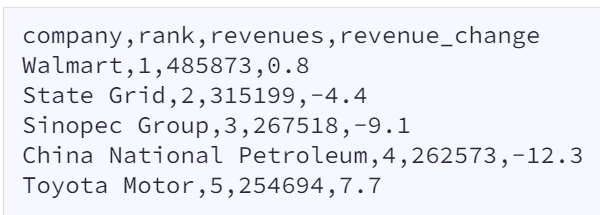

In the previous exercise, the code snippet above was used to read the CSV file into a pandas dataframe and set the index name to None:

When you compared the first few rows and columns of the f500_selection dataframe to the raw values below, you may have noticed that the row labels (along the index axis) are actually the values from the first column in the CSV file, company:

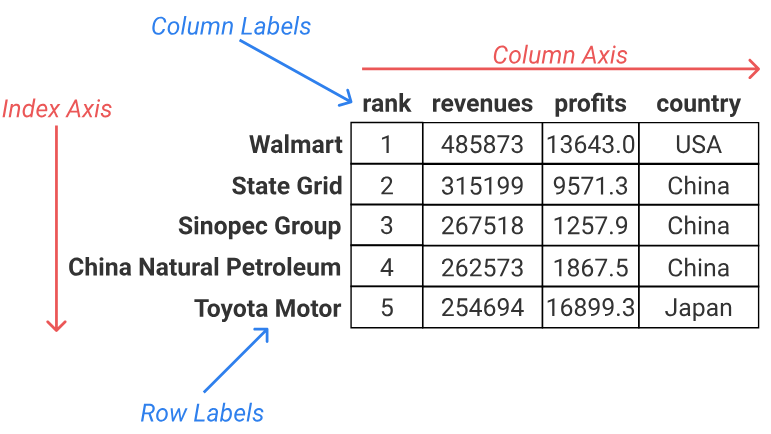

If we check the documentation for the [read_csv() function](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), we can see why. The index_col parameter is an optional argument that specifies which column to use to set the Row Labels for our dataframe. For example, when we used a value of 0 for this parameter, we specified that we wanted to use the first column (company) to set the row labels.

When we specify a column for the index_col parameter, the pandas.read_csv() funtion uses the values in that column to label each row. For this reason, we should only use columns that contain unique values (like the company column) when setting the index_col parameter because each row should have a unique label. This uniqueness ensures that each row can be uniquely identified and accessed by its index label. To be clear, pandas does allow indexes with duplicates, but having a unique index simplifies many operations and prevents issues with data retrieval.

## Naming DataFrame Axes

Let's look at what happens if we use the index_col parameter but don't set the index name to None using the code: 


f500.index.name = None.

In [7]:
f500 = pd.read_csv('../Datasets/f500.csv', index_col=0)
f500[['rank', 'revenues', 'revenue_change']].head()

,rank,revenues,revenue_change
company,,,
Walmart,1,485873,0.8
State Grid,2,315199,-4.4
Sinopec Group,3,267518,-9.1
China National Petroleum,4,262573,-12.3
Toyota Motor,5,254694,7.7


Notice above the row labels, we now have the text company where we didn't before. This corresponds to the name of the first column (column index: 0) in the CSV file. Pandas used the column name to set the Index Name for the index axis.

Also, notice how the dataframe no longer has a company column; instead, it's used to set the index for the dataframe. We know the company column is no longer a standard column in our f500 dataframe above because we specifically selected the columns rank, revenue, and revenue_change, but not company.

In pandas, both the index and column axes can have names assigned to them.

In [8]:
f500.index.name = "Company Names"
f500.columns.name = "Company Metrics"

print(f500[['rank', 'revenues', 'revenue_change']].head())

Company Metrics           rank  revenues  revenue_change
Company Names                                           
Walmart                      1    485873             0.8
State Grid                   2    315199            -4.4
Sinopec Group                3    267518            -9.1
China National Petroleum     4    262573           -12.3
Toyota Motor                 5    254694             7.7


Notice how both the Column Axis and Index Axis now have names: Company Metrics and Company Names, respectively. You can think of these names as "labels for your labels." Some people find these names make their dataframes harder to read, while others feel it makes them easier to interpret. In the end, the choice comes down to personal preference, and it can change depending on the situation.

Now let's see what the dataframe looks like if we use pandas.read_csv() without specifying a value for the index_col parameter.

In [9]:
f500 = pd.read_csv('../Datasets/f500.csv')
f500.head(2)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456


In [10]:
f500.index.name = 'Company'
f500.columns.name = 'Metric'

In [11]:
f500.head(2)

Metric,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
Company,,,,,,,,,,,,,,,,,
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456


In [13]:
f500.loc[f500['previous_rank'] == 0, 'previous_rank'] = np.nan

## Using iloc to Select by Integer Location

During the previous exercise, we read our CSV file into pandas again. However, this time, we didn't use the index_col parameter:

In [15]:
f500 = pd.read_csv("../Datasets/f500.csv")
print(f500[['company', 'rank', 'revenues']].head())

                    company  rank  revenues
0                   Walmart     1    485873
1                State Grid     2    315199
2             Sinopec Group     3    267518
3  China National Petroleum     4    262573
4              Toyota Motor     5    254694


There are two differences with this approach:

- The company column is now included as a regular column, instead of being used for the index.
- The index labels are now integers starting from 0.

This is the more conventional way to read in a dataframe, and it's the method we'll use from here on.

Recall that when we worked with a dataframe with string index labels, we used loc[] to select data:

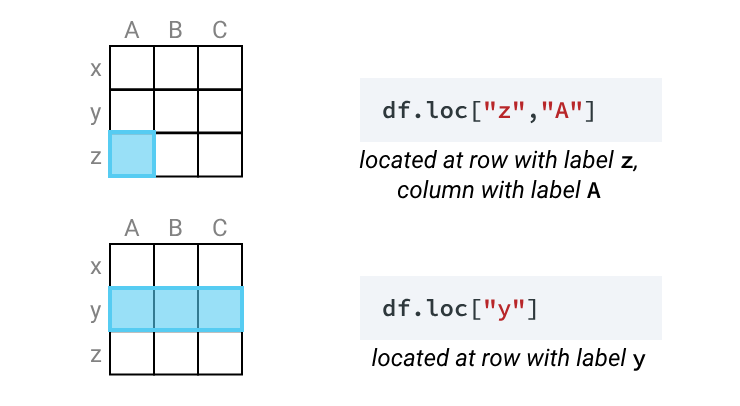

In some cases, using labels makes selections easier — in others, it makes things harder.

Just like in NumPy, we can also use integer locations to select data using Dataframe.iloc[] and Series.iloc[]. It's easy to get loc[] and iloc[] confused at first, but the easiest way is to remember the first letter of each method:

- loc: label based selection
- iloc: integer location based selection

Using iloc[] is almost identical to indexing with NumPy, with integer positions starting at 0 like ndarrays and Python lists. Let's look at how we would perform the selection above using iloc[]:

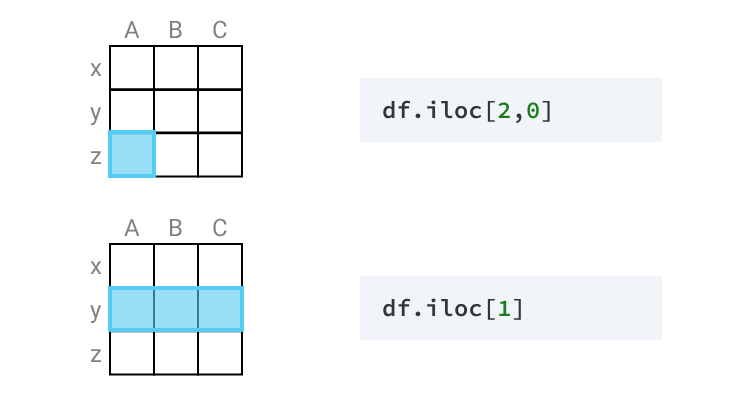

As you can see, DataFrame.iloc[] behaves similarly to DataFrame.loc[]. The full syntax for DataFrame.iloc[], in pseudocode, is:

df.iloc[row_index, column_index]

In [17]:
# Select just the fifth row of the f500 dataframe
f500.iloc[4]

company                                     Toyota Motor
rank                                                   5
revenues                                          254694
revenue_change                                       7.7
profits                                          16899.3
assets                                            437575
profit_change                                      -12.3
ceo                                          Akio Toyoda
industry                        Motor Vehicles and Parts
sector                            Motor Vehicles & Parts
previous_rank                                          8
country                                            Japan
hq_location                                Toyota, Japan
website                     http://www.toyota-global.com
years_on_global_500_list                              23
employees                                         364445
total_stockholder_equity                          157210
Name: 4, dtype: object

In [18]:
# Select the value in first row of the company column
f500.iloc[0,0]

'Walmart'

On the previous screen, we learned how to select a row or value by integer location using DataFrame.iloc[]. As a reminder, the full syntax for DataFrame.iloc[] in pseudocode is:

df.iloc[row_index, column_index]

Let's say we wanted to select just the first column from our f500 dataframe. To do this, we use : (a colon) to select all rows, and then use the integer 0 to select the first column:

In [19]:
first_column = f500.iloc[:, 0]
print(first_column)

0                             Walmart
1                          State Grid
2                       Sinopec Group
3            China National Petroleum
4                        Toyota Motor
                    ...              
495    Teva Pharmaceutical Industries
496          New China Life Insurance
497         Wm. Morrison Supermarkets
498                               TUI
499                        AutoNation
Name: company, Length: 500, dtype: object


To specify a positional slice, we can take advantage of the same shortcut syntax that we use with labels. Here's how we would select the rows between index positions one to four (inclusive):

In [20]:
f500[1:5]

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


In the example above, the row at index position 5 is excluded, just as if we were slicing a Python list or NumPy ndarray. As a reminder, loc[] handles slicing differently:

- With loc[], the end index is included.
- With iloc[], the end index is not included.

The table below summarizes how we can use DataFrame.iloc[] and Series.iloc[] to select by integer location:

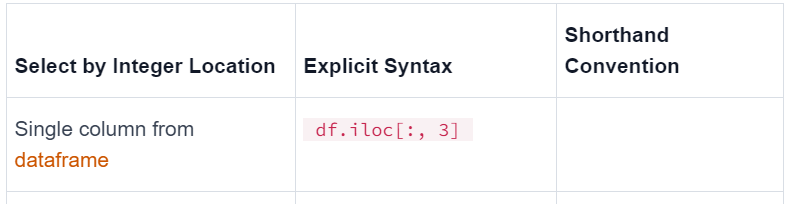

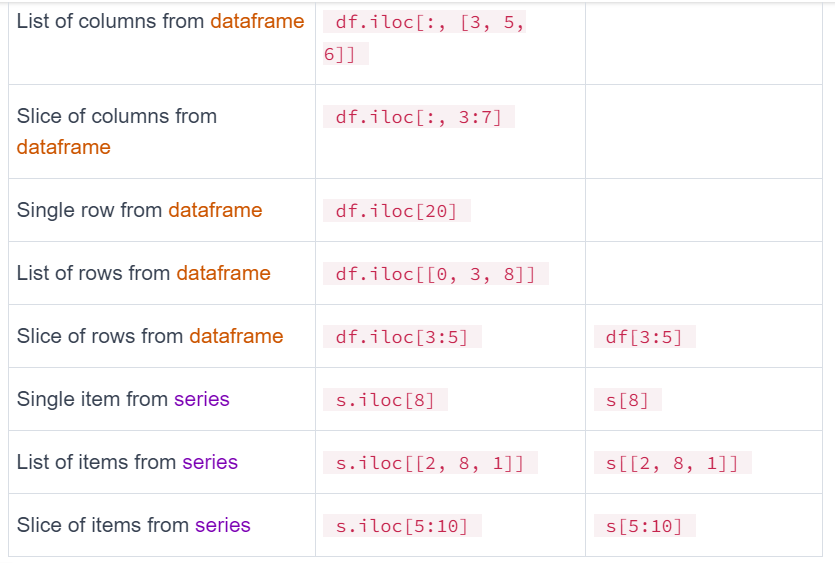

In [21]:
# Select the first three rows of the f500 dataframe
f500.iloc[:3]

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523


Select the first and seventh rows while selecting the first five columns of the f500 dataframe. 

In [22]:
f500.iloc[[0, 6], :5]

,company,rank,revenues,revenue_change,profits
0,Walmart,1,485873,0.8,13643.0
6,Royal Dutch Shell,7,240033,-11.8,4575.0


## Using pandas Methods to Create Boolean Masks

In the last couple of lessons, we used Python boolean comparison operators like >, <, and == to create boolean masks to select subsets of data. There are also a number of pandas methods that return boolean masks useful for exploring data.

Two examples are the [Series.isnull() method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isnull.html) and [Series.notnull() method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.notnull.html). These can be used to select either rows that contain null (or NaN) values or rows that do not contain null values for a certain column. Notice that both methods work on series objects, not dataframes.

First, let's use the Series.isnull() method to view rows with null values in the revenue_change column:

In [26]:
f500[f500['revenue_change'].isnull()]

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
90,Uniper,91,74407,NaN,-3557.5,51541,NaN,Klaus Schafer,Energy,Energy,0,Germany,"Dusseldorf, Germany",http://www.uniper.energy,1,12890,12889
180,Hewlett Packard Enterprise,181,50123,NaN,3161.0,79679,NaN,Margaret C. Whitman,Information Technology Services,Technology,0,USA,"Palo Alto, CA",http://www.hpe.com,1,195000,31448


In [27]:
rev_change_null = f500["revenue_change"].isnull()
print(rev_change_null.head())

0    False
1    False
2    False
3    False
4    False
Name: revenue_change, dtype: bool


 We see that using Series.isnull() resulted in a boolean series. Just like in NumPy, we can use this series to filter our dataframe, f500:

In [28]:
print(f500[rev_change_null][["company", "country", "sector"]])

                        company  country      sector
90                       Uniper  Germany      Energy
180  Hewlett Packard Enterprise      USA  Technology


Let's break down this snippet of code to see how it works. First, we create rev_change_null, a boolean mask, using Series.isnull(). The resulting series holds True for rows where revenue_change is missing in f500, and False otherwise.

Now, the magic happens when we pass this boolean series to f500[rev_change_null]. This is where boolean indexing comes into play. When we apply the mask to the f500 dataframe, we're telling pandas: "Hey, show me only those rows in f500 where rev_change_null is True – that is, where the revenue change is a mystery."

The last piece of the puzzle is this: f500[rev_change_null][["company", "country", "sector"]]. Here, we refine our previous result by specifying the columns we're interested in. We're essentially saying, "From the rows where the revenue change is missing (f500[rev_change_null]), just give me the company, country, and sector columns ([["company", "country", "sector"]])." It's a neat way to zoom in on the data we want to see.

The final result confirms that the two companies with missing values for the revenue_change column are Uniper, a German energy company, and Hewlett Parkard Enterprise, an American technology company.

In [33]:
f500.loc[f500['previous_rank'] == 0,'previous_rank'] = np.nan

In [41]:
prev_rank_is_null = f500.loc[f500['previous_rank'].isnull(), ['company', 'rank', 'previous_rank']]

## Working with Integer Labels

In the previous exercise, we selected the rows with null values in the previous_rank column. Below are the first few rows:

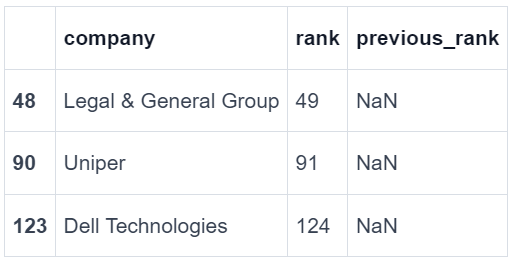

Above, we can see that index axis labels for this selection are 48, 90, and 123.

If we wanted to select the first company from our new null_prev_rank dataframe by integer location, we can use DataFrame.iloc[]:

In [36]:
null_prev_rank = f500[f500["previous_rank"].isnull()][["company","rank", "previous_rank"]]
first_null_prev_rank = null_prev_rank.iloc[0]
print(first_null_prev_rank)

company          Legal & General Group
rank                                49
previous_rank                      NaN
Name: 48, dtype: object


Let's see what happens when we use DataFrame.loc[] instead of DataFrame.iloc[]:

In [38]:
# first_null_prev_rank = null_prev_rank.loc[0]

We get an error, KeyError: 0. This error is telling us that the the label [0] is not in the index. Recall that DataFrame.loc[] is used for label based selection:

- loc: label based selection
- iloc: integer location based selection

Because there is no row with a 0 label in the index, we got the error above. If we wanted to select the first row of null_prev_rank using loc[], we'd have to use the integer label for the first row — 48.

In [39]:
first_null_prev_rank = null_prev_rank.loc[48]
print(first_null_prev_rank)

company          Legal & General Group
rank                                49
previous_rank                      NaN
Name: 48, dtype: object


Always think carefully about whether you want to select by label or integer location; use DataFrame.loc[] or DataFrame.iloc[], respectively.

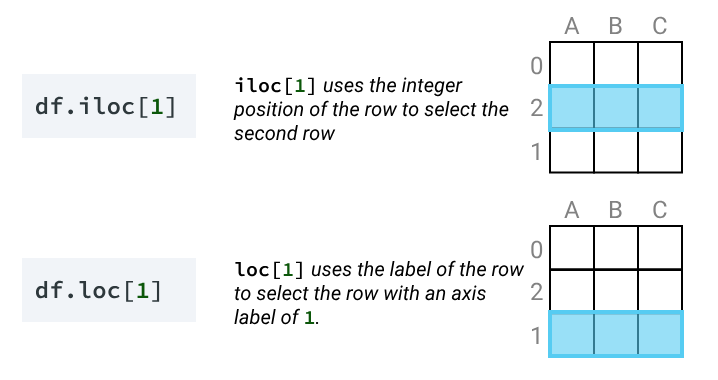

In [42]:
prev_rank_is_null[:5]

,company,rank,previous_rank
48,Legal & General Group,49,NaN
90,Uniper,91,NaN
123,Dell Technologies,124,NaN
138,Anbang Insurance Group,139,NaN
140,Albertsons Cos.,141,NaN


In [44]:
prev_rank_is_null.iloc[:5]

,company,rank,previous_rank
48,Legal & General Group,49,NaN
90,Uniper,91,NaN
123,Dell Technologies,124,NaN
138,Anbang Insurance Group,139,NaN
140,Albertsons Cos.,141,NaN


## Pandas Index Alignment

Now that we've identified the rows with null values in the previous_rank column, let's use the Series.notnull() method to exclude them from the next part of our analysis.

In [45]:
previously_ranked = f500[f500["previous_rank"].notnull()]

We can then create a rank_change column by subtracting the rank column from the previous_rank column:

In [47]:
rank_change = previously_ranked["previous_rank"] - previously_ranked["rank"]
print(rank_change.shape)
print(rank_change.tail(3))

(467,)
496   -70.0
497   -61.0
498   -32.0
dtype: float64


Above, we can see that our rank_change series has 467 rows. Since the last integer index label is 498, we know that our index labels no longer align with the integer positions.

Suppose we decided to add the rank_change series to the f500 dataframe as a new column. Its index labels no longer match the index labels in f500, so how could this be done?

Another powerful aspect of pandas is that almost every operation will align on the index labels. Let's look at an example. Below we have a dataframe named food and a series named alt_name:

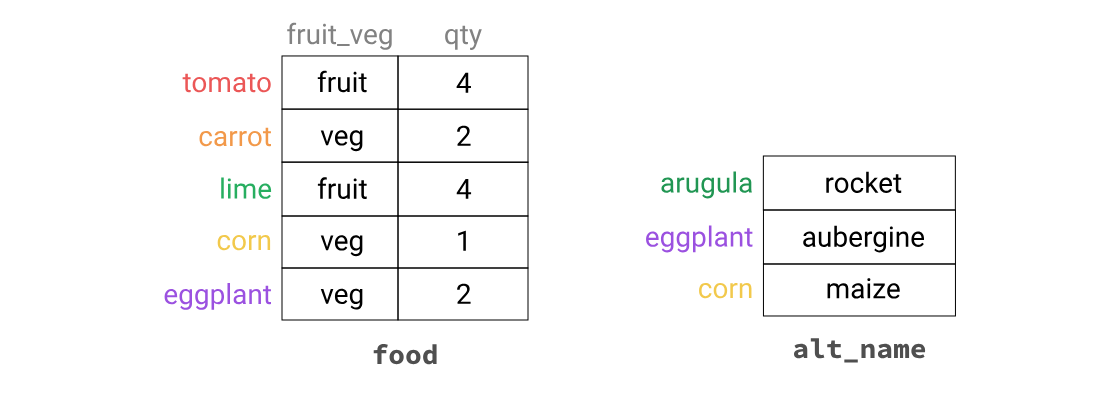

The food dataframe and the alt_name series not only have a different number of items, they also have two of the same index labels (corn and eggplant) and they're in a different order. If we wanted to add alt_name as a new column in our food dataframe, we can use the following code:

food["alt_name"] = alt_name

When we do this, pandas will ignore the order of the alt_name series, and align on the index labels:

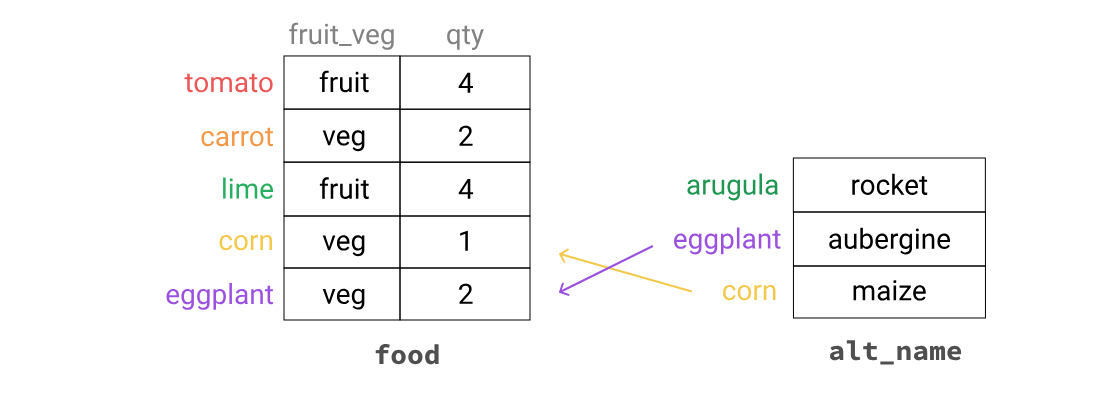

Pandas will also:

- Discard any items that have an index that doesn't match the dataframe (like arugula).
- Fill any remaining rows with NaN.
Below is the result:

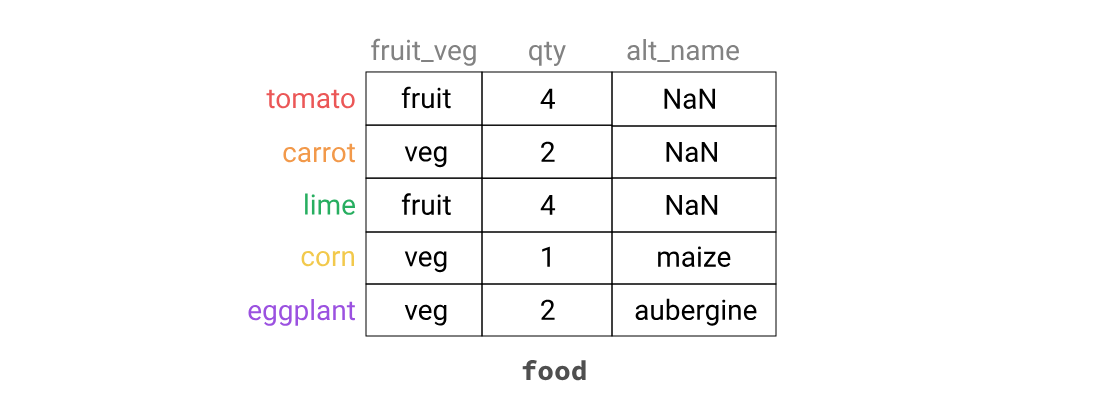

In [51]:
#  select all rows from f500 that have non-null values for the profits column.
profited = f500[f500['profits'].notnull()]

In [52]:
costs = profited['revenues'] - profited['profits']

In [54]:
f500['costs'] = costs

In [55]:
f500.head()

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,costs
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1.0,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798,472230.0
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2.0,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456,305627.7
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4.0,China,"Beijing, China",http://www.sinopec.com,19,713288,106523,266260.1
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3.0,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893,260705.5
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8.0,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210,237794.7


## Using Boolean Operators

Boolean indexing is a powerful tool that allows us to select or exclude parts of our data based on their values. However, to answer more complex questions, we need to be able to use multiple boolean arrays at the same time.

To recap, boolean arrays are created using any of the Python standard comparison operators: == (equal), > (greater than), < (less than), != (not equal).

We combine boolean arrays using boolean operators. In Python, these boolean operators are and, or, and not. In pandas, these operators are slightly different:

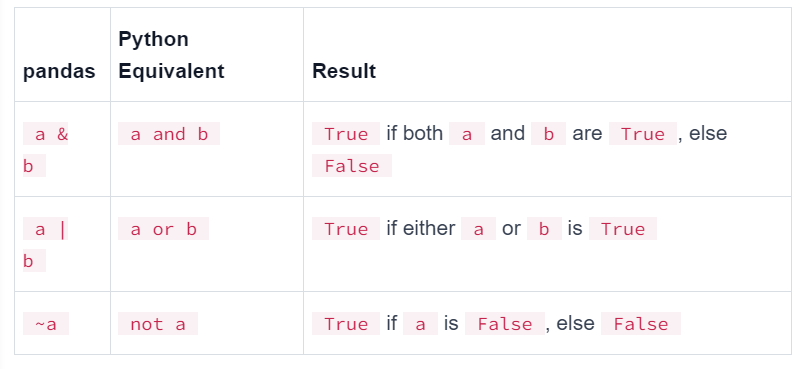

Let's look at an example using f500_sel, a small selection of our f500 dataframe:

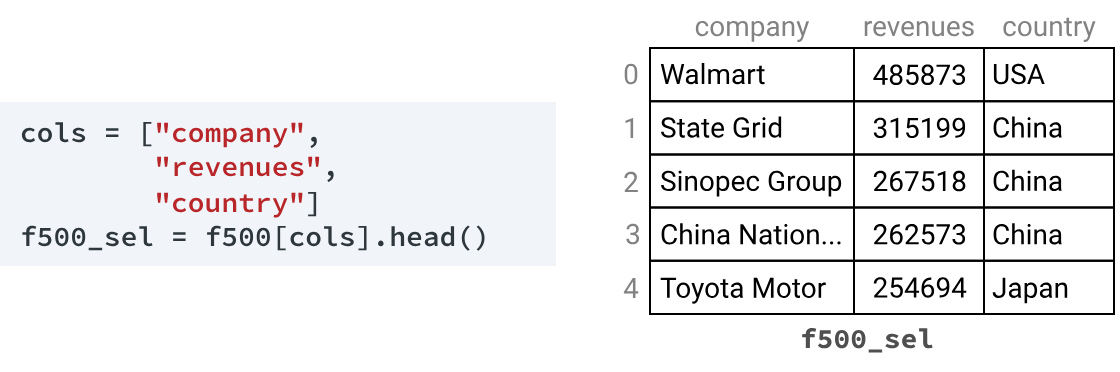

Suppose we wanted to find the companies in f500_sel with more than 265 billion in revenue and that are headquartered in China. We'll start by performing two boolean comparisons to produce two separate boolean arrays. Heads up: the revenues column is in millions, not billions.

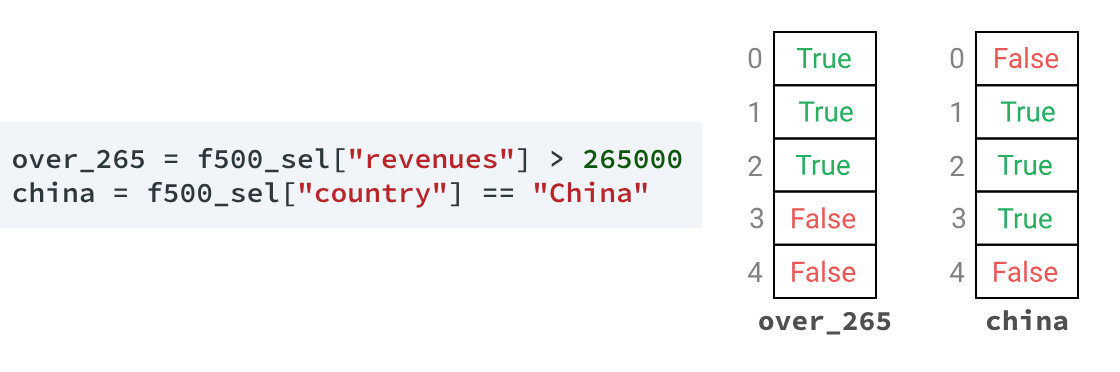

Next, we use the & operator to combine the two boolean arrays using boolean "and" logic:

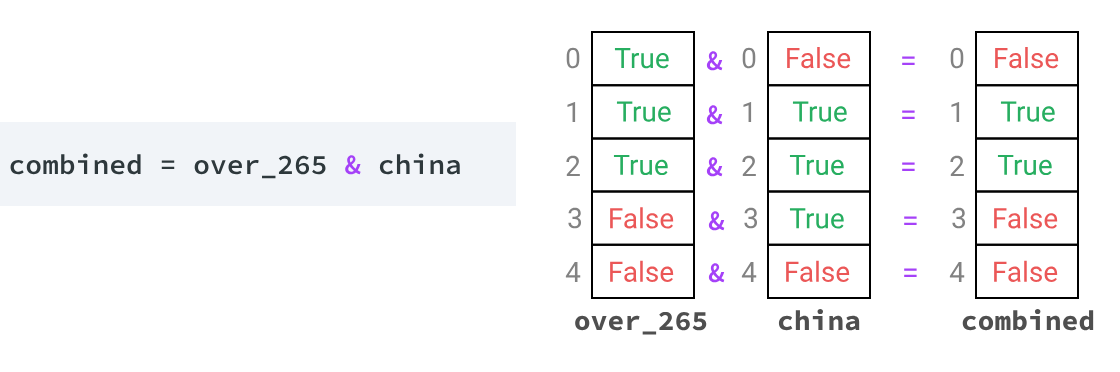

Lastly, we use the combined boolean array to make our selection on the entire dataframe:

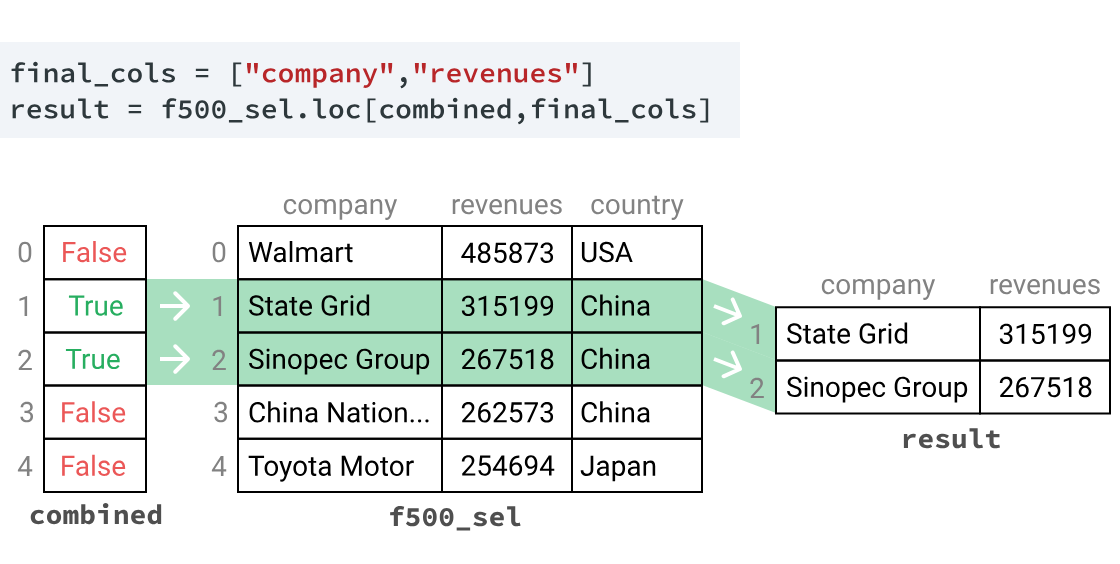

The result gives us two companies from f500_sel that are both Chinese and have over 265 billion in revenue.

Select all companies that have over 100 billion in revenues and negative profits from the f500 dataframe. The final result will include all columns.

In [66]:
f500[(f500['revenues'] > 100000) & (f500['profits'] < 0)]

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,costs
32,Japan Post Holdings,33,122990,3.6,-267.4,2631385,-107.5,Masatsugu Nagato,"Insurance: Life, Health (stock)",Financials,37.0,Japan,"Tokyo, Japan",http://www.japanpost.jp,21,248384,91532,123257.4
44,Chevron,45,107567,-18.0,-497.0,260078,-110.8,John S. Watson,Petroleum Refining,Energy,31.0,USA,"San Ramon, CA",http://www.chevron.com,23,55200,145556,108064.0


In the previous exercise, we identified the two companies that have both over 100 billion in revenue and negative profits using the following code:

In [67]:
large_revenue = f500["revenues"] > 100000
negative_profits = f500["profits"] < 0
combined = large_revenue & negative_profits
big_rev_neg_profit = f500[combined]

In [68]:
big_rev_neg_profit

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,costs
32,Japan Post Holdings,33,122990,3.6,-267.4,2631385,-107.5,Masatsugu Nagato,"Insurance: Life, Health (stock)",Financials,37.0,Japan,"Tokyo, Japan",http://www.japanpost.jp,21,248384,91532,123257.4
44,Chevron,45,107567,-18.0,-497.0,260078,-110.8,John S. Watson,Petroleum Refining,Energy,31.0,USA,"San Ramon, CA",http://www.chevron.com,23,55200,145556,108064.0


But we can do better! The first place we can optimize our code is by combining our two boolean arrays in a single line, instead of assigning them to intermediate variables first (large_revenue and negative_profits). Just like when we use a single boolean array to make a selection, we don't need to use intermediate variables. Here's how we do that:

In [69]:
combined = (f500["revenues"] > 100000) & (f500["profits"] < 0)
big_rev_neg_profit = f500[combined]

Notice that we placed parentheses () around each of our boolean comparisons. This is critical — our boolean operation will fail without wrapping each comparison in parentheses — because Python will attempt to evaluate the entire expression in a different order than we intend.

Python has an order of operations so we need to use parentheses here to ensure our selection is interpreted correctly. For clarity, Python will try to evaluate < and > before &, but the first thing it tries to evaluate are expressions wrapped in parentheses, just like in math class!

Lastly, instead of assigning the boolean arrays to the combined variable, we can insert the comparison directly into our selection:

Whether to make the comparison directly while making our selection is very much a matter of taste. As always, your decision should be driven by what will make your code more readable.

Let's take a closer look at the ~ boolean operator, which can also help make our code more readable.

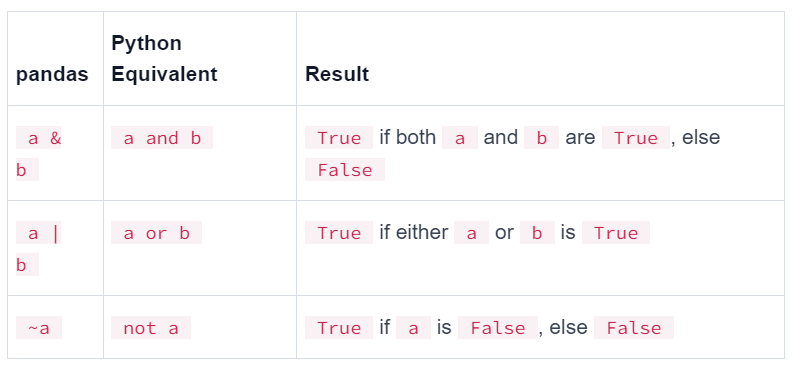

The ~ not operator is very useful when making selections that require us to switch all the boolean values in a selection from True to False and vice versa. For example, if we use:

df[df["A"] == X]

to select all the rows of df where the values in column A are equal to X, then we can use:

 df[~(df["A"] == X)]

to select all the rows of df where the values in column A are not equal to X. Notice that the ~ operator is placed outside the parentheses that defines the selection.

Of course we can make the same selection using df[df["A"] != X], but depending on the use case, using the ~ operator can make our selection logic easier to follow.

Select all companies whose country value is either "Brazil" or "Venezuela". Assign the resulting dataframe to brazil_venezuela.

In [72]:
f500[f500['country'].isin(['Brazil', 'Venezuela'])]

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,costs
74,Petrobras,75,81405,-16.3,-4838.0,246983,NaN,Pedro Pullen Parente,Petroleum Refining,Energy,58.0,Brazil,"Rio de Janeiro, Brazil",http://www.petrobras.com.br,23,68829,76779,86243.0
112,Itau Unibanco Holding,113,66876,21.4,6666.4,415972,-13.7,Candido Botelho Bracher,Banks: Commercial and Savings,Financials,159.0,Brazil,"Sao Paulo, Brazil",http://www.itau.com.br,4,94779,37680,60209.6
150,Banco do Brasil,151,58093,-13.4,2013.8,426416,-52.3,Paulo Rogerio Caffarelli,Banks: Commercial and Savings,Financials,115.0,Brazil,"Brasilia, Brazil",http://www.bb.com.br,23,100622,26551,56079.2
153,Banco Bradesco,154,57443,31.3,5127.9,366418,-5.7,Luiz Carlos Trabuco Cappi,Banks: Commercial and Savings,Financials,209.0,Brazil,"Osasco, Brazil",http://www.bradesco.com.br,21,94541,32369,52315.1
190,JBS,191,48825,-0.1,107.7,31605,-92.3,Wesley Mendonca Batista,Food Production,"Food, Beverages & Tobacco",185.0,Brazil,"Sao Paulo, Brazil",http://jbss.infoinvest.com.br,8,237061,7307,48717.3
369,Vale,370,29363,14.7,3982.0,99014,NaN,Fabio Schvartsman,"Mining, Crude-Oil Production",Energy,417.0,Brazil,"Rio de Janeiro, Brazil",http://www.vale.com,11,73062,39042,25381.0
441,Mercantil Servicios Financieros,442,24403,50.3,2004.2,148659,-10.5,Gustavo J. Vollmer A.,Banks: Commercial and Savings,Financials,NaN,Venezuela,"Caracas, Venezuela",http://www.msf.com,1,8370,7550,22398.8
486,Ultrapar Holdings,487,22167,-2.3,447.5,7426,-0.8,Thilo Mannhardt,Energy,Energy,474.0,Brazil,"Sao Paulo, Brazil",http://www.ultra.com.br,8,15173,2621,21719.5


In [74]:
f500[(f500['country'] == 'Brazil') | (f500['country'] == 'Venezuela')]

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,costs
74,Petrobras,75,81405,-16.3,-4838.0,246983,NaN,Pedro Pullen Parente,Petroleum Refining,Energy,58.0,Brazil,"Rio de Janeiro, Brazil",http://www.petrobras.com.br,23,68829,76779,86243.0
112,Itau Unibanco Holding,113,66876,21.4,6666.4,415972,-13.7,Candido Botelho Bracher,Banks: Commercial and Savings,Financials,159.0,Brazil,"Sao Paulo, Brazil",http://www.itau.com.br,4,94779,37680,60209.6
150,Banco do Brasil,151,58093,-13.4,2013.8,426416,-52.3,Paulo Rogerio Caffarelli,Banks: Commercial and Savings,Financials,115.0,Brazil,"Brasilia, Brazil",http://www.bb.com.br,23,100622,26551,56079.2
153,Banco Bradesco,154,57443,31.3,5127.9,366418,-5.7,Luiz Carlos Trabuco Cappi,Banks: Commercial and Savings,Financials,209.0,Brazil,"Osasco, Brazil",http://www.bradesco.com.br,21,94541,32369,52315.1
190,JBS,191,48825,-0.1,107.7,31605,-92.3,Wesley Mendonca Batista,Food Production,"Food, Beverages & Tobacco",185.0,Brazil,"Sao Paulo, Brazil",http://jbss.infoinvest.com.br,8,237061,7307,48717.3
369,Vale,370,29363,14.7,3982.0,99014,NaN,Fabio Schvartsman,"Mining, Crude-Oil Production",Energy,417.0,Brazil,"Rio de Janeiro, Brazil",http://www.vale.com,11,73062,39042,25381.0
441,Mercantil Servicios Financieros,442,24403,50.3,2004.2,148659,-10.5,Gustavo J. Vollmer A.,Banks: Commercial and Savings,Financials,NaN,Venezuela,"Caracas, Venezuela",http://www.msf.com,1,8370,7550,22398.8
486,Ultrapar Holdings,487,22167,-2.3,447.5,7426,-0.8,Thilo Mannhardt,Energy,Energy,474.0,Brazil,"Sao Paulo, Brazil",http://www.ultra.com.br,8,15173,2621,21719.5


Select the first five companies in the "Technology" "sector" for which the "country" is not "USA"

In [79]:
f500.loc[(f500['sector'] == 'Technology') & ~(f500['country'] == 'USA'), 'country'].head()

14     South Korea
26          Taiwan
70           Japan
82           China
104          Japan
Name: country, dtype: object

##  Sorting Values

Let's continue by looking at how we can answer even more complex questions about our dataset. Suppose we wanted to find the company that employs the most people in China. We can accomplish this by first selecting all of the rows where the country column equals China:

In [80]:
selected_rows = f500[f500["country"] == "China"]

In [81]:
sorted_rows = selected_rows.sort_values("employees")
print(sorted_rows[["company", "country", "employees"]].head())

                                company country  employees
204                         Noble Group   China       1000
458             Yango Financial Holding   China      10234
438  China National Aviation Fuel Group   China      11739
128                         Tewoo Group   China      17353
182            Amer International Group   China      17852


By default, the sort_values() method will sort the rows in ascending order — from smallest to largest.

To sort the rows in descending order — from largest to smallest — we set the ascending parameter of the method to False:

In [82]:
sorted_rows = selected_rows.sort_values("employees", ascending=False)
print(sorted_rows[["company", "country", "employees"]].head())

                        company country  employees
3      China National Petroleum   China    1512048
118            China Post Group   China     941211
1                    State Grid   China     926067
2                 Sinopec Group   China     713288
37   Agricultural Bank of China   China     501368


Now, we can see that the Chinese company that employs the most people is China National Petroleum. Let's find the Japanese company with the most profits next.

In [96]:
f500.loc[f500['country'] == 'Japan', ['company', 'country', 'profits']].sort_values('profits', ascending=False).iloc[0]

company    Toyota Motor
country           Japan
profits         16899.3
Name: 4, dtype: object

## Using Loops with pandas

We just confirmed that the Japanese company with the highest profits (16899.3) is Toyota Motor.

We've seen the power of sort_values(). But let's tackle a bigger challenge: finding the largest employer in each of 34 countries. Relying solely on sort_values() here isn't the best tool for the job. It's like using a screwdriver to hammer a nail – not quite right. Why? Because sort_values() alone can't efficiently segment our data by country before identifying the top employer. We need a smarter approach, and that's where loops come into play. They may not be as sleek as some pandas methods, but they'll get us across the finish line effectively in this case.

In [100]:
.nunique()

34

In [103]:
all_countries = list(set(f500['country']))

In [116]:
for country in all_countries:
    val = f500.loc[f500['country'] == country, ['country', 'company', 'employees']].sort_values('employees', ascending=False).iloc[0]
    print(val['country'], val.loc['company'], val['employees'])

Switzerland Nestle 328000
Venezuela Mercantil Servicios Financieros 8370
Ireland Accenture 384000
Britain Compass Group 527180
Israel Teva Pharmaceutical Industries 56960
Russia Gazprom 467400
Singapore Flex 200000
France Sodexo 425594
Turkey Koc Holding 95456
Australia Wesfarmers 220000
Denmark Maersk Group 87736
U.A.E Emirates Group 64768
Spain Banco Santander 185606
Sweden H & M Hennes & Mauritz 114586
Malaysia Petronas 51034
China China National Petroleum 1512048
USA Walmart 2300000
Luxembourg ArcelorMittal 198517
Saudi Arabia SABIC 35000
South Korea Samsung Electronics 325000
Mexico America Movil 194193
Norway Statoil 20539
Canada George Weston 195000
Finland Nokia 102687
India State Bank of India 278872
Belgium Anheuser-Busch InBev 206633
Thailand PTT 24934
Japan Toyota Motor 364445
Italy Poste Italiane 136739
Taiwan Hon Hai Precision Industry 726772
Brazil JBS 237061
Germany Volkswagen 626715
Indonesia Pertamina 27227
Netherlands EXOR Group 302562


We've explicitly avoided using loops in pandas because one of the key benefits of pandas is that it has vectorized methods to work with data more efficiently. We'll learn more advanced techniques in later courses, but for now, we'll learn how to use for loops for aggregation in pandas.

Aggregation is where we apply a statistical operation to groups of our data. For example, let's say that we wanted to calculate the average revenue for each country in the dataset. Our process might look like this:

- Identify each unique country in the dataset.
- For each country:
    - Select only the rows corresponding to that country.
    - Calculate the average revenue for those rows.
    - Store the results in a dictionary with the country as the key, and the average revenue as the value.

To identify the unique countries, we can use the [Series.unique() method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html). This method returns a NumPy array of unique values from any series (i.e., a column of a dataframe). Then, we can loop over that array and perform our operation. Here's what that looks like:

In [122]:
f500['country'].unique()

array(['USA', 'China', 'Japan', 'Germany', 'Netherlands', 'Britain',
       'South Korea', 'Switzerland', 'France', 'Taiwan', 'Singapore',
       'Italy', 'Russia', 'Spain', 'Brazil', 'Mexico', 'Luxembourg',
       'India', 'Malaysia', 'Thailand', 'Australia', 'Belgium', 'Norway',
       'Canada', 'Ireland', 'Indonesia', 'Denmark', 'Saudi Arabia',
       'Sweden', 'Finland', 'Venezuela', 'Turkey', 'U.A.E', 'Israel'],
      dtype=object)

In [123]:
# Create an empty dictionary to store the results
avg_rev_by_country = {}

# Create an array of unique countries
countries = f500["country"].unique()

# Use a for loop to iterate over the unique countries
for c in countries:
    # Use a boolean comparison to select only rows that
    # correspond to the country for this iteration
    selected_rows = f500[f500["country"] == c]
    # Calculate the mean revenue for the selected rows
    mean = selected_rows["revenues"].mean()
    # Assign the mean value to the dictionary, using the
    # country name as the key
    avg_rev_by_country[c] = mean

The resulting dictionary is below (we've shown just the first few keys):

In [124]:
avg_rev_by_country

{'USA': 64218.371212121216,
 'China': 55397.880733944956,
 'Japan': 53164.03921568627,
 'Germany': 63915.0,
 'Netherlands': 61708.92857142857,
 'Britain': 51588.708333333336,
 'South Korea': 49725.6,
 'Switzerland': 51353.57142857143,
 'France': 55231.793103448275,
 'Taiwan': 46364.666666666664,
 'Singapore': 54454.333333333336,
 'Italy': 51899.57142857143,
 'Russia': 65247.75,
 'Spain': 40600.666666666664,
 'Brazil': 52024.57142857143,
 'Mexico': 54987.5,
 'Luxembourg': 56791.0,
 'India': 39993.0,
 'Malaysia': 49479.0,
 'Thailand': 48719.0,
 'Australia': 33688.71428571428,
 'Belgium': 45905.0,
 'Norway': 45873.0,
 'Canada': 31848.0,
 'Ireland': 32819.5,
 'Indonesia': 36487.0,
 'Denmark': 35464.0,
 'Saudi Arabia': 35421.0,
 'Sweden': 27963.666666666668,
 'Finland': 26113.0,
 'Venezuela': 24403.0,
 'Turkey': 23456.0,
 'U.A.E': 22799.0,
 'Israel': 21903.0}

Let's use this technique to find the company that employs the most people in each country.

In [134]:
companies_with_most_emps = {}

# Get the unique countries
unique_country = f500['country'].unique()

for c in unique_country:
    # get data corresponding to each country
    data = f500.loc[f500['country'] == c, ['company', 'employees']]
    
    # sort by employees in descending order
    val = data.sort_values('employees', ascending=False).iloc[0]
    companies_with_most_emps[c] = val.loc['company'] 

In [135]:
companies_with_most_emps

{'USA': 'Walmart',
 'China': 'China National Petroleum',
 'Japan': 'Toyota Motor',
 'Germany': 'Volkswagen',
 'Netherlands': 'EXOR Group',
 'Britain': 'Compass Group',
 'South Korea': 'Samsung Electronics',
 'Switzerland': 'Nestle',
 'France': 'Sodexo',
 'Taiwan': 'Hon Hai Precision Industry',
 'Singapore': 'Flex',
 'Italy': 'Poste Italiane',
 'Russia': 'Gazprom',
 'Spain': 'Banco Santander',
 'Brazil': 'JBS',
 'Mexico': 'America Movil',
 'Luxembourg': 'ArcelorMittal',
 'India': 'State Bank of India',
 'Malaysia': 'Petronas',
 'Thailand': 'PTT',
 'Australia': 'Wesfarmers',
 'Belgium': 'Anheuser-Busch InBev',
 'Norway': 'Statoil',
 'Canada': 'George Weston',
 'Ireland': 'Accenture',
 'Indonesia': 'Pertamina',
 'Denmark': 'Maersk Group',
 'Saudi Arabia': 'SABIC',
 'Sweden': 'H & M Hennes & Mauritz',
 'Finland': 'Nokia',
 'Venezuela': 'Mercantil Servicios Financieros',
 'Turkey': 'Koc Holding',
 'U.A.E': 'Emirates Group',
 'Israel': 'Teva Pharmaceutical Industries'}

##  Challenge: Calculating Return on Assets by Sector

We've learned a number of new techniques for selecting and analyzing data in this lesson ― now it's time for an exercise to bring everything together! In this challenge we're going to add a new column to our dataframe, and then perform an aggregation using that new column.

The column we'll create is going to contain a metric called return on assets (ROA). ROA is a business-specific metric that measures a company's ability to make profit based on their available assets.

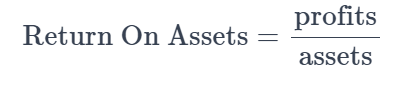

Once we've created the new column, we'll aggregate by sector, and find the company with the highest ROA from each sector. 

In [136]:
f500['roa'] = f500['profits'] / f500['assets']

In [142]:
companies_with_highest_roa = {}
# get unique sectors
unique_sectors = f500['sector'].unique()

for sector in unique_sectors:
    data = f500[f500['sector'] == sector]
    
    sorted_val = data.sort_values('roa', ascending=False).iloc[0]
    companies_with_highest_roa[sector] = sorted_val['company']

In [143]:
companies_with_highest_roa

{'Retailing': 'H & M Hennes & Mauritz',
 'Energy': 'National Grid',
 'Motor Vehicles & Parts': 'Subaru',
 'Financials': 'Berkshire Hathaway',
 'Technology': 'Accenture',
 'Wholesalers': 'McKesson',
 'Health Care': 'Gilead Sciences',
 'Telecommunications': 'KDDI',
 'Engineering & Construction': 'Pacific Construction Group',
 'Industrials': '3M',
 'Food & Drug Stores': 'Publix Super Markets',
 'Aerospace & Defense': 'Lockheed Martin',
 'Food, Beverages & Tobacco': 'Philip Morris International',
 'Household Products': 'Unilever',
 'Transportation': 'Delta Air Lines',
 'Materials': 'CRH',
 'Chemicals': 'LyondellBasell Industries',
 'Media': 'Disney',
 'Apparel': 'Nike',
 'Hotels, Restaurants & Leisure': 'McDonald’s',
 'Business Services': 'Adecco Group'}

In this lesson, we learned how to:

- Select columns, rows, and individual items using their integer location.
- Use pd.read_csv() to read CSV files in pandas.
- Work with integer axis labels.
- Use pandas methods to produce boolean arrays.
- Use boolean operators to combine boolean comparisons to perform more complex selections.
- Use index labels to align data.
- Use aggregation to perform advanced analysis using a for loop.